# 1. Conocer nuestra libreria 

In [1]:
# Carga de librerías y lectura del archivo que contiene los datos

import numpy as np
import pandas as pd
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt


# luego procede a cargar el data frame 

In [2]:
data = pd.read_csv('/Users/m1pro/Documents/inteligencia artificial/Repositorio/Miguel-Saavedra/data/iris 2/iris.data')

# Previsualizacion de datos  para confirmar el correcto  carga de datos 

In [7]:
shape = data.shape

In [8]:
print(shape)

(149, 5)


# Tenmos que es una matriz de  149 registros (filas) con  5 atributos

In [9]:
data

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,Iris-virginica
145,6.3,2.5,5.0,1.9,Iris-virginica
146,6.5,3.0,5.2,2.0,Iris-virginica
147,6.2,3.4,5.4,2.3,Iris-virginica


# luego organizamos nuestro data set , asignando  los  Key y target 

In [10]:
data.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

In [11]:
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,Iris-virginica
145,6.3,2.5,5.0,1.9,Iris-virginica
146,6.5,3.0,5.2,2.0,Iris-virginica
147,6.2,3.4,5.4,2.3,Iris-virginica


In [14]:
print("keys of iris_dataset: \n{}".format(data.keys()))

keys of iris_dataset: 
Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')


In [15]:
print("target names: {}".format(data['species'].unique()))

target names: ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [ ]:
# Ahora dterminamos que tipo de datos Tenemos en nuestro dataset , para ello usamos el metodo .dtypes de pandas. 

In [16]:
data.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

# El data set tiene datos flotantes parar sepalos y petalos, con decimales y la especies son de texto 

In [17]:
#Medida de centralidad y desviación para atributos numéricos:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,149.000000,149.000000,149.000000,149.000000
mean,5.848322,3.051007,3.774497,1.205369
std,0.828594,0.433499,1.759651,0.761292
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


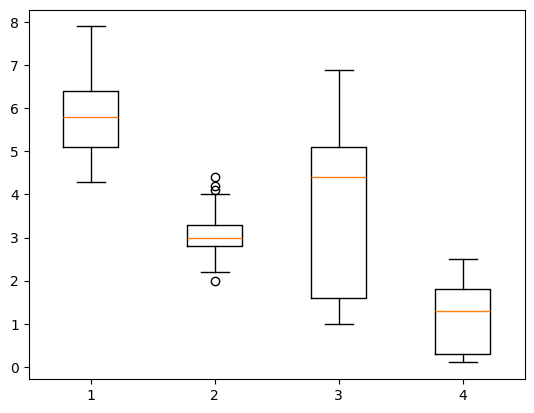

In [18]:
# Diagrama de cajas y bigotes para atributos numéricos
# Permite identificar la existencia de datos atípicos

plt.boxplot((data['sepal_length'],data['sepal_width'],data['petal_length'],data['petal_width'],))
plt.show()

In [ ]:
# para visualizar la distribución de los datos usamos grafico de cajas y bigotes, donde vemos la distribución de los datos y la presencia de datos atípicos, en este caso se observan datos atípicos en el ancho de los petaloes .

In [19]:
#Medida de centralidad para atributos categóricos:
data.mode()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.0,3.0,1.5,0.2,Iris-versicolor
1,NaN,NaN,NaN,NaN,Iris-virginica


# la moda es una medida de centralidad  que no permite   entender las medidas que mas se repiten en nustra data set 

In [ ]:
# Para establecer la orrlacion entre variables, por tener un string en la variable species, se debe convertir a un valor numérico, para ello se usa el metodo Label enconder de la biblioteca skleanlearn de pandas

In [21]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['species'] = label_encoder.fit_transform(data['species'])


In [22]:
# Correlación entre los atributos de entrada numéricos
# Permite detectar si hay atributos redundantes (correlación mayor a 0.85 o menor a -0.85)
data.corr()

,sepal_length,sepal_width,petal_length,petal_width,species
sepal_length,1.000000,-0.103784,0.871283,0.816971,0.781219
sepal_width,-0.103784,1.000000,-0.415218,-0.350733,-0.414532
petal_length,0.871283,-0.415218,1.000000,0.962314,0.948519
petal_width,0.816971,-0.350733,0.962314,1.000000,0.956014
species,0.781219,-0.414532,0.948519,0.956014,1.000000


In [23]:
#Cuantos datos faltantes hay por cada atributo?
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

# vemos que no faltan datos 

In [25]:
#Cuantos registros hay por cada clase? es decir, por cada valor del atributo de salida?

print(data['species'].value_counts())


species
1    50
2    50
0    49
Name: count, dtype: int64


#  2. ahora que conocemos nuestro dataframe , se procede con la PREPARACION DE DATOS  

# El data frame no necesita preparacion, esta limpio 

# 3 MODELADO

In [29]:
# Define the variable 'dataBal' before using it
dataBal = data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.drop('species', axis=1), data.species, test_size=0.30)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(104, 4) (104,)
(45, 4) (45,)


# Analiza la complejidad de diferentes modelos KNN, primero construimos nuestro modelo KNN

In [45]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

In [46]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [47]:
# Código para predecir con el modelo KNN y el conjunto de prueba
y_pred = knn.predict(X_test)
print("Test set predictions:\n {}".format(y_pred))



Test set predictions:
 [2 2 1 1 0 0 1 1 2 1 0 1 1 2 0 0 0 2 2 2 1 2 1 1 0 2 0 2 2 2 2 1 1 0 2 0 1
 0 2 2 1 0 1 2 0]


In [48]:

# Código para calcular y mostrar la precisión del conjunto de prueba
print("Test set score: {:.2f}".format(np.mean(y_pred == y_test)))



Test set score: 0.93


In [49]:


# Se menciona también que se puede utilizar el método score del objeto KNN para calcular la precisión
print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))



Test set score: 0.93


# MODELO CON  2 VECINOS

In [51]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=2)

In [52]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [53]:
# Código para predecir con el modelo KNN y el conjunto de prueba
y_pred = knn.predict(X_test)
print("Test set predictions:\n {}".format(y_pred))



Test set predictions:
 [1 2 1 1 0 0 1 1 2 1 0 1 1 2 0 0 0 2 2 2 1 2 1 1 0 2 0 2 2 2 2 1 1 0 2 0 1
 0 2 2 1 0 1 2 0]


In [54]:

# Código para calcular y mostrar la precisión del conjunto de prueba
print("Test set score: {:.2f}".format(np.mean(y_pred == y_test)))



Test set score: 0.96


In [55]:


# Se menciona también que se puede utilizar el método score del objeto KNN para calcular la precisión
print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))



Test set score: 0.96


# MODELO CON  3 VECINOS

In [57]:
from sklearn.neighbors import KNeighborsClassifier
knn.fit(X_train, y_train)
knn = KNeighborsClassifier(n_neighbors=3)

In [58]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [59]:
# Código para predecir con el modelo KNN y el conjunto de prueba
y_pred = knn.predict(X_test)
print("Test set predictions:\n {}".format(y_pred))



Test set predictions:
 [1 2 1 1 0 0 1 1 2 1 0 1 1 2 0 0 0 2 2 2 1 2 1 1 0 2 0 2 2 2 2 1 1 0 2 0 1
 0 2 2 1 0 1 2 0]


In [60]:

# Código para calcular y mostrar la precisión del conjunto de prueba
print("Test set score: {:.2f}".format(np.mean(y_pred == y_test)))



Test set score: 0.96


In [ ]:


# Se menciona también que se puede utilizar el método score del objeto KNN para calcular la precisión
print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))



Test set score: 0.96


# con el Modelo de evaluacio Anterior , notamos diferencia en  1 y 2 vecinos ,pero no cuando tomamos 3 vecinos   

# se realiza una evaluacion del modelo de entrenamiento con metodo for de pyuthon ,  dentro del bucle, se varia el número de vecinos y se crea  un nuevo modelo KNN para cada valor de vecinos

In [61]:

from sklearn.metrics import accuracy_score

# Definir el rango de valores para el número de vecinos que quieres probar
k_values = range(1, 26)  # Por ejemplo, de 1 a 25

# Lista para guardar las puntuaciones de precisión para cada modelo
scores = []

# Entrenar y evaluar un modelo KNN para cada valor de k
for k in k_values:
    # Crear el modelo KNN con k vecinos
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Entrenar el modelo
    knn.fit(X_train, y_train)
    
    # Hacer predicciones en el conjunto de prueba
    y_pred = knn.predict(X_test)
    
    # Calcular la precisión del modelo y guardarla
    score = accuracy_score(y_test, y_pred)
    scores.append(score)
    
    # Imprimir la precisión para este valor particular de k
    print("Número de vecinos: {}, Precisión del conjunto de prueba: {:.2f}".format(k, score))


Número de vecinos: 1, Precisión del conjunto de prueba: 0.93
Número de vecinos: 2, Precisión del conjunto de prueba: 0.96
Número de vecinos: 3, Precisión del conjunto de prueba: 0.96
Número de vecinos: 4, Precisión del conjunto de prueba: 0.96
Número de vecinos: 5, Precisión del conjunto de prueba: 0.93
Número de vecinos: 6, Precisión del conjunto de prueba: 0.96
Número de vecinos: 7, Precisión del conjunto de prueba: 0.93
Número de vecinos: 8, Precisión del conjunto de prueba: 0.98
Número de vecinos: 9, Precisión del conjunto de prueba: 0.93
Número de vecinos: 10, Precisión del conjunto de prueba: 0.96
Número de vecinos: 11, Precisión del conjunto de prueba: 0.93
Número de vecinos: 12, Precisión del conjunto de prueba: 0.96
Número de vecinos: 13, Precisión del conjunto de prueba: 0.91
Número de vecinos: 14, Precisión del conjunto de prueba: 0.93
Número de vecinos: 15, Precisión del conjunto de prueba: 0.93
Número de vecinos: 16, Precisión del conjunto de prueba: 0.93
Número de vecinos

# Lo que observamos   es que el numero de vecino ideas esta entre 2 y tres vecinos    

FIN